In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data1=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0141-07.z_w_top.nc')
C = data1.variables['z_w_top'][:]/100
B = C[0:42]

In [3]:
B[10:20]

array([100.     , 110.     , 120.     , 130.     , 140.     , 150.     ,
       160.     , 170.19682, 180.76129, 191.82124], dtype=float32)

In [4]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(141,181)]
i =0
resultup = np.zeros((480,10))
resultdown = np.zeros((480,10))
result = np.zeros((480,10))

In [5]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.TEMP.nc')
        plotvar = data.variables['TEMP'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[200:600,550:1500]
        latt = latt[200:600,550:1500]
        plotvar = plotvar[:,200:600,550:1500]
        aveplot = plotvar.mean(axis=1)
        aveplot = aveplot.mean(axis=1)
        resultup[i] = aveplot[0:10]
        resultdown[i] = aveplot[10:20]
        result[i] = resultup[i] - resultdown[i]
        i = i + 1
#********************************************************************

In [6]:
result.shape

(480, 10)

In [7]:
rr = result.mean(axis=1)

In [8]:
data1 = rr.reshape(12,40)

In [9]:
mea = data1.mean(axis = 0)
#ww = np.convolve(mea, np.ones((5,))/5, mode='valid')


In [10]:
my_font = {'fontname':'Cambria', 'size':'14'}

In [11]:
ww2= mea.mean()
ww3= mea-ww2

In [12]:
# 5 year running average
window = 5
weights = np.repeat(1.0, window)/window
ww3ave = np.convolve(ww3, weights, 'valid')

In [13]:
dataq = np.loadtxt("result.out")
dataq1 = dataq.reshape(12,40)
meaq = dataq1.mean(axis = 0)
#wwq = np.convolve(meaq, np.ones((5,))/5, mode='valid')
ww2q= meaq.mean()
ww3q= meaq-ww2q

In [14]:
# 5 year running average
window = 5
weights = np.repeat(1.0, window)/window
ww3qave = np.convolve(ww3q, weights, 'valid')

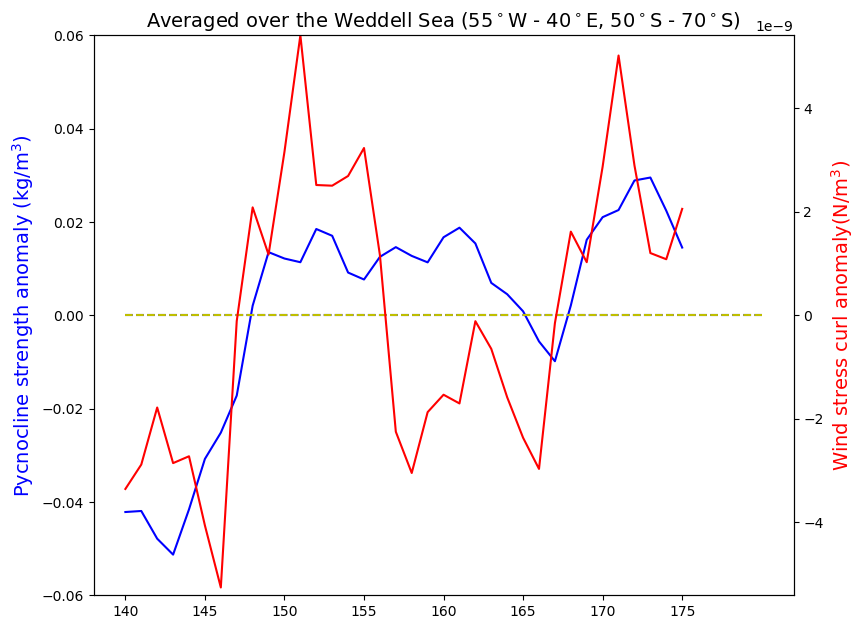

In [17]:
fig = plt.figure(figsize=(10,8), dpi=100)
ax0 = fig.add_axes([0.2, 0.1, 0.7, 0.7])
ax0.plot(ww3ave,'b')
plt.hlines(0, 0, 40, colors = "b",linestyles = "dashed")
plt.ylim(ymin = -0.06)
plt.ylim(ymax = 0.06)

plt.ylabel('Pycnocline strength anomaly (kg/m$^3$)',**my_font)
ax0.yaxis.label.set_color('b')


ax2 = ax0.twinx() 

ax2.plot(ww3qave*0.0001,'r')
plt.ylim(ymin = -ww3qave.max()*0.0001)
plt.ylim(ymax = ww3qave.max()*0.0001)
plt.hlines(0, 0, 40, colors = "y",linestyles = "dashed")
plt.xticks(range(0,40,5), ['140', '145','150', '155', '160', '165','170','175','180'])
plt.xlabel('Year',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',**my_font)
ax2.yaxis.label.set_color('red')
ax0.set_title('Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
plt.savefig("c3ave.png")